# Tantic compeitition

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
data = pd.read_csv('/Users/pein/kaggle/train.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

(array([ 549.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  342.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

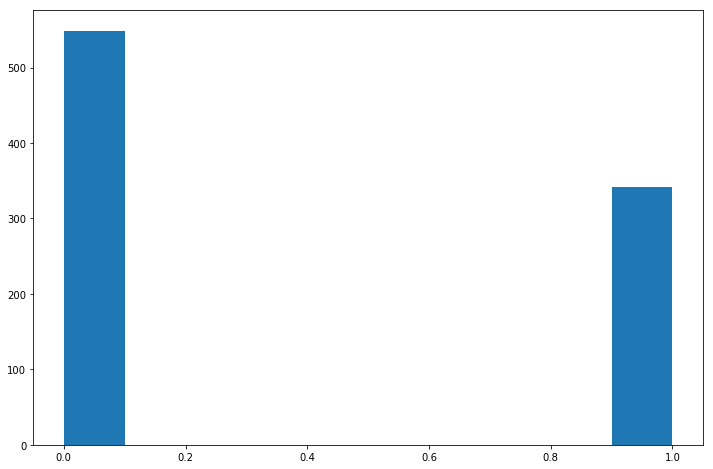

In [14]:
plt.figure(figsize=(12,8))
plt.hist(data.Survived)

In [21]:
# Fill the null value age by the mean 
# the other way will be added in the future
mean_age = data.Age.mean()

In [22]:
mean_age

29.69911764705882

In [45]:
data['Age'][np.isnan(data['Age'])] = mean_age

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=8,n_jobs=-1)


In [70]:
# split the train into train and target
data_train = data.iloc[:,[2,4,5,11]]
data_test = data.iloc[:,1]

In [73]:
data_train_dummy = pd.get_dummies(data_train)


In [79]:
type(data_test[1])

numpy.int64

In [54]:
# the first way is to try more model then use Gridsearch to change the parameters in the mode

In [75]:
# First try the rnd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
rfc_scores = cross_val_score(rfc_clf,data_train_dummy,data_test,
                            cv=5)

In [76]:
rfc_scores

array([ 0.83240223,  0.83240223,  0.78089888,  0.7752809 ,  0.81355932])

In [77]:
# let's try the another way


In [80]:
# Let's change the parameters in the selected model
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[1,2,3,4,5,6]}
]
grid_search = GridSearchCV(rfc_clf,param_grid,cv=5)
grid_search.fit(data_train_dummy,data_test)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=8,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [81]:
grid_search.best_params_

{'max_features': 5, 'n_estimators': 3}

In [87]:
# Ok Use them param
rfc_final = RandomForestClassifier(n_estimators=3,max_features=5)

In [88]:
rfc_final.fit(data_train_dummy,data_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=3, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [89]:
# get the test data
test = pd.read_csv('/Users/pein/kaggle/test.csv')

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [91]:
test1 = test.iloc[:,[1,3,4,10]]

In [92]:
test1.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
Embarked    418 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 13.1+ KB


In [94]:
test1_dummy = pd.get_dummies(test1)

In [95]:
test1_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass        418 non-null int64
Age           332 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(1), int64(1), uint8(5)
memory usage: 8.7 KB


In [96]:
test1_dummy['Age'][np.isnan(test1_dummy['Age'])] = mean_age

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [97]:
test1_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass        418 non-null int64
Age           418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(1), int64(1), uint8(5)
memory usage: 8.7 KB


In [99]:
result = rfc_final.predict(test1_dummy)

In [100]:
type(result)

numpy.ndarray

In [101]:
np.savetxt('foo.csv',result,delimiter=',')